## クーポンコレクタ問題

1日にランダムかつ重複ありで1つのクーポンが得られる。集め始めてからk日目に初めて73種類のクーポンをコンプリートする確率を求めよ

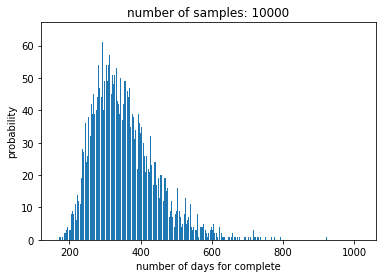

In [20]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import random


# randomモジュールの関数randint(a, b)はa <= n <= bのランダムな整数intを返す。
# 73個全ての化石の所有数が1以上になったときにwhileループを抜け、それまでにかかった日数を返す関数
def get_days():
    fossil_list = [0] * 73
    days = 0
    while min(fossil_list) == 0:
        num_fossil_per_day = 1
        for i in range(num_fossil_per_day):
            fossil_list[random.randint(0, 72)] += 1
        days += 1

    # print(sorted(fossil_list))
    return days

# かかった日数をnum回取得して分布を取得する。numが大きいほど分布は正確になる
def days_plot(num=1000):
    days = [get_days() for i in range(num)]

    c = collections.Counter(days)
    key = list(c.keys())
    value = list(c.values())

    # print("最短でコンプリートできる日数:", min(key))
    left = np.array(key)
    height = np.array(value)
    plt.title('number of samples: {}'.format(num))
    plt.xlabel('number of days for complete')
    plt.ylabel('probability')
    plt.bar(left, height)
    plt.show()

    
# days_plot(100)
# days_plot(1000)
days_plot(10000)
# days_plot(100000)

### 疑問
この分布は計算機的にしか求められないのか、それとも分布を数学的に求められるのか

### 答え: 第二種スターリングで分布を求められる

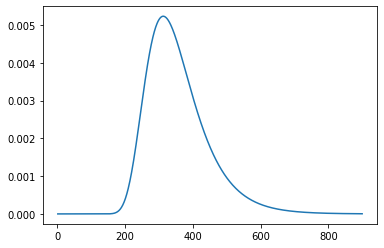

In [21]:

from sympy.functions.combinatorial.numbers import stirling
import matplotlib.pyplot as plt
import math

k = 73
numTrial = 900
x = []
y = []
for n in range(1, numTrial+1):
    stir = stirling(n-1, k-1, kind = 2)
    prob = math.factorial(k) * stir / (k**n)
    x.append(n)
    y.append(prob)
plt.plot(x, y, label='k = {}'.format(k))
